In [64]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import common
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
import json
import shapely.geometry as geom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Data

In [2]:
df = common.load_data(nrows=1000000)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 1000000
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 25.4953958988 seconds



# Seaborn Properties

In [37]:
sns.set_context("poster", font_scale=1.5)

# Density Plots

In [87]:
def plot_manhattan(ax):
    with open("../sandbox/nyc.geo.json") as f:
        nyc_dict = json.loads(f.read())
        nyc = geom.shape(nyc_dict["geometry"])
        manh = max(iter(nyc), key=lambda v: v.area)
        x, y = manh.exterior.xy
        ax.plot(x, y, "k-", linewidth=6)


def plot_density(df, start_dt, end_dt, rtype, ax):
    params = {"dropoff" : ("dropoff_datetime", "Dropoff Density",
                           common.get_dropoff_geos),
              "pickup": ("pickup_datetime", "Pickup Density",
                         common.get_pickup_geos)}
    ttype, tle, efunc = params[rtype]
    sdf = common.query_dates(df, start_dt, end_dt, ttype) 
    data = efunc(sdf)
    ax = sns.kdeplot(data[:, 0], data[:, 1], shade=False, n_levels=25,
                cmap="jet", ax=ax)
    minx, miny, maxx, maxy = common.MANHATTAN_POLY.bounds
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    #plt.xlim(minx, maxx)
    #plt.ylim(miny, maxy)
    #plt.title(tle)
    return ax


def make_density_plots(start_dt, end_dt, ax1, ax2):
    plot_manhattan(ax1)
    plot_density(df, start_dt, end_dt, "pickup", ax1)
    plot_manhattan(ax2)
    return plot_density(df, start_dt, end_dt, "dropoff", ax2)

    
#make_density_plots()

# Animation


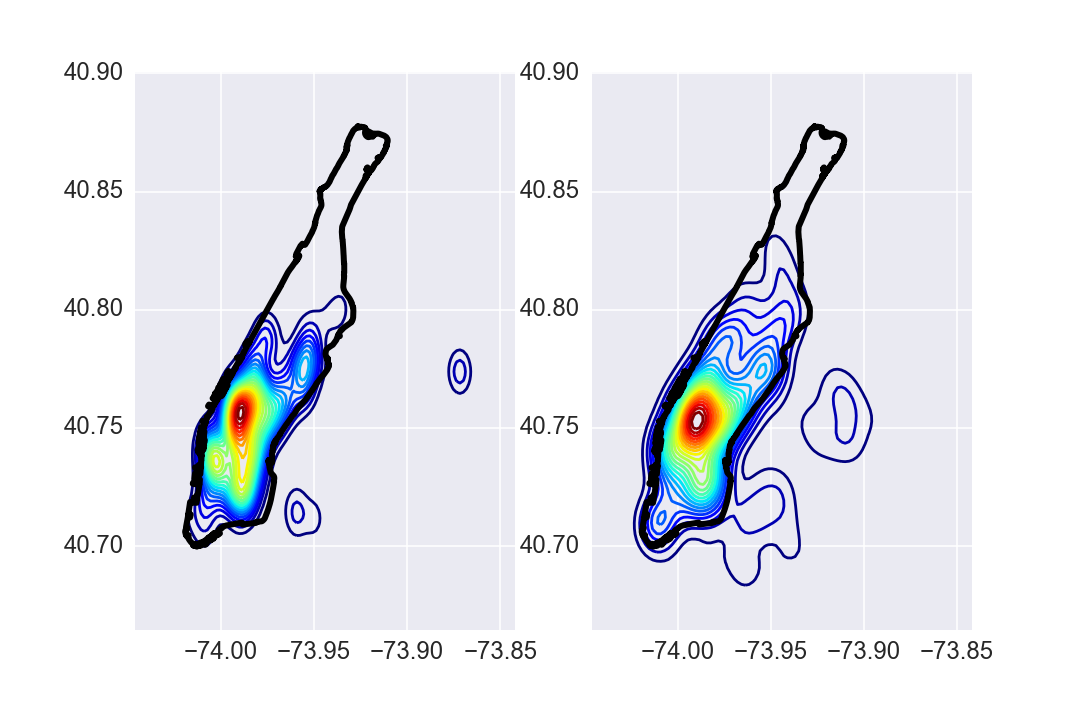
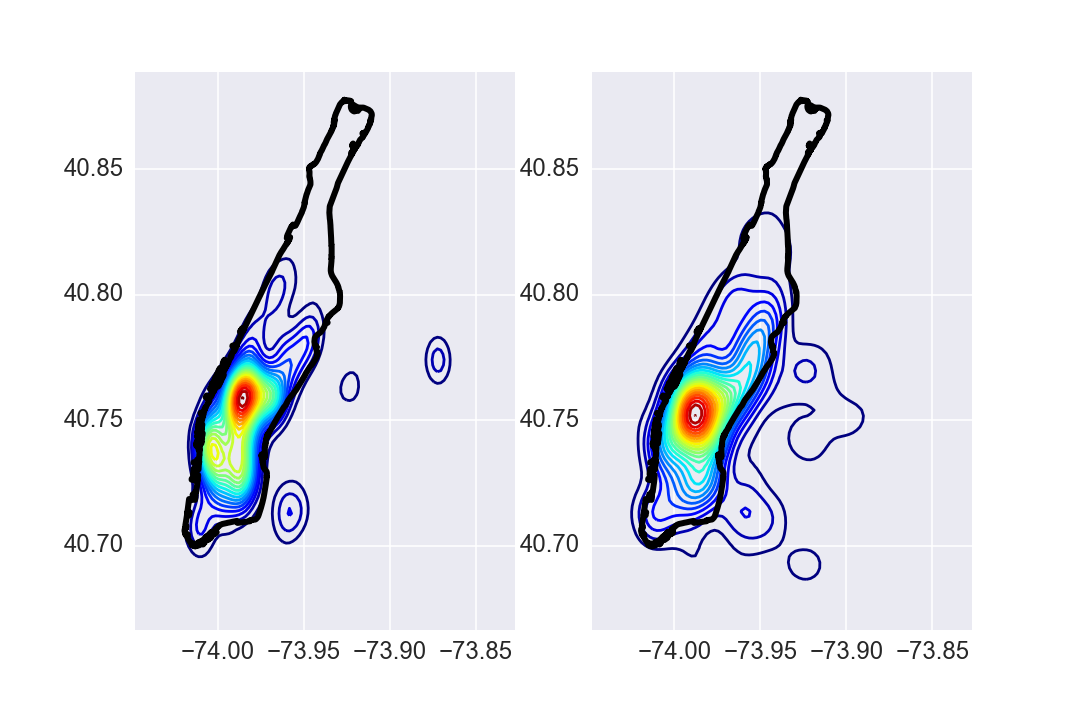
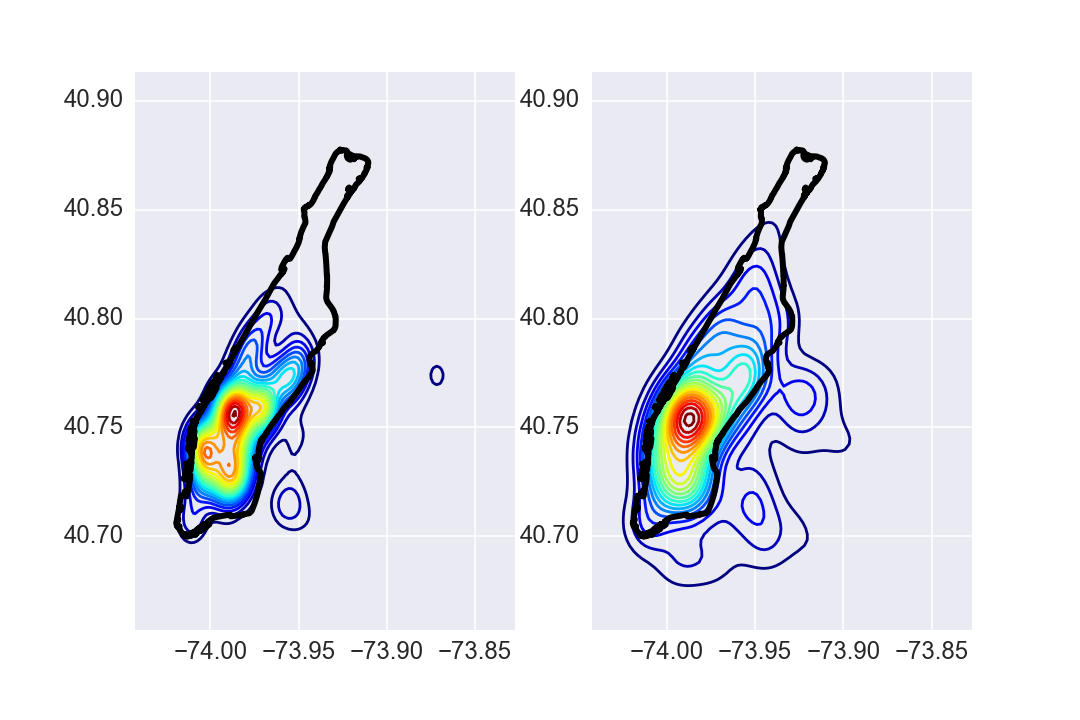
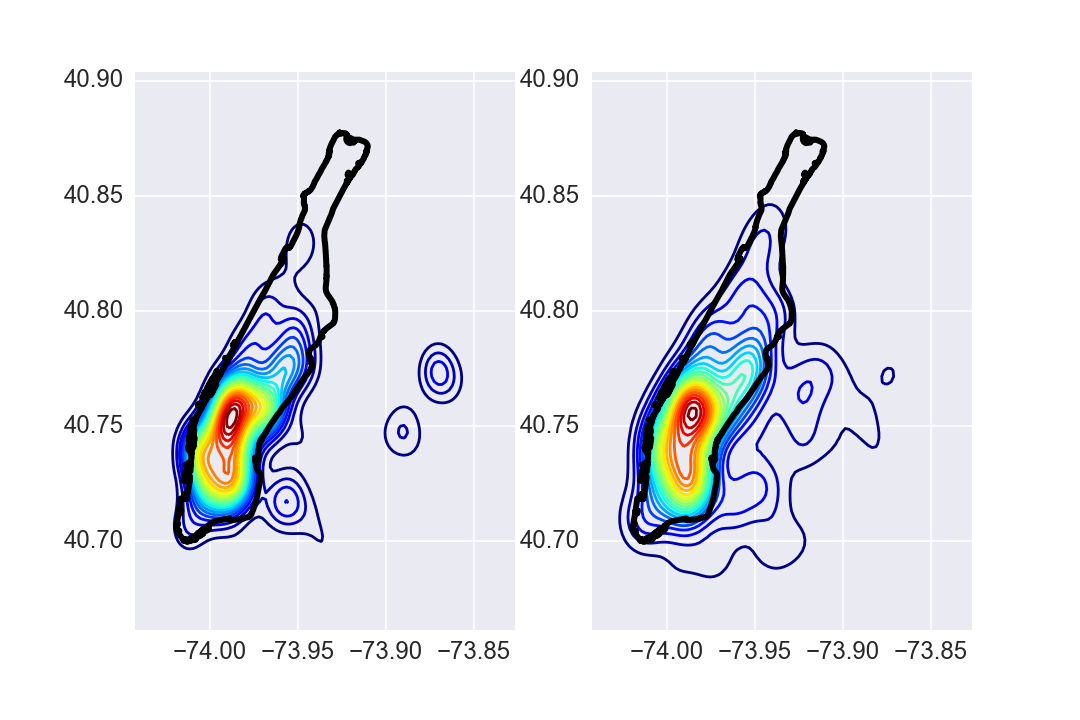
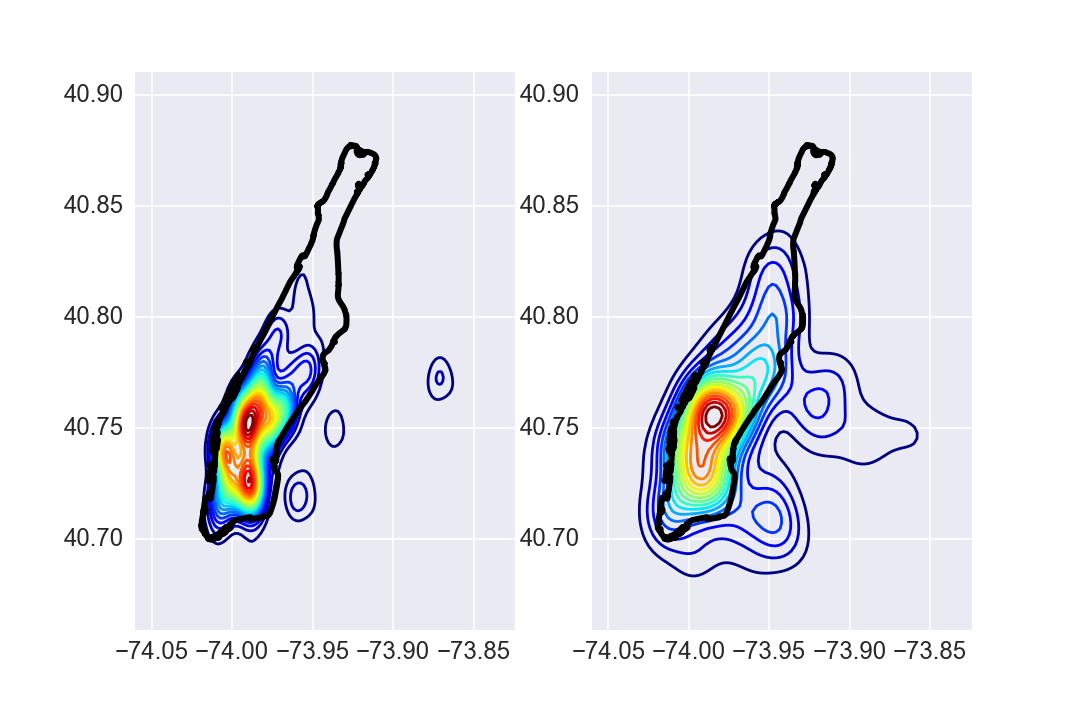
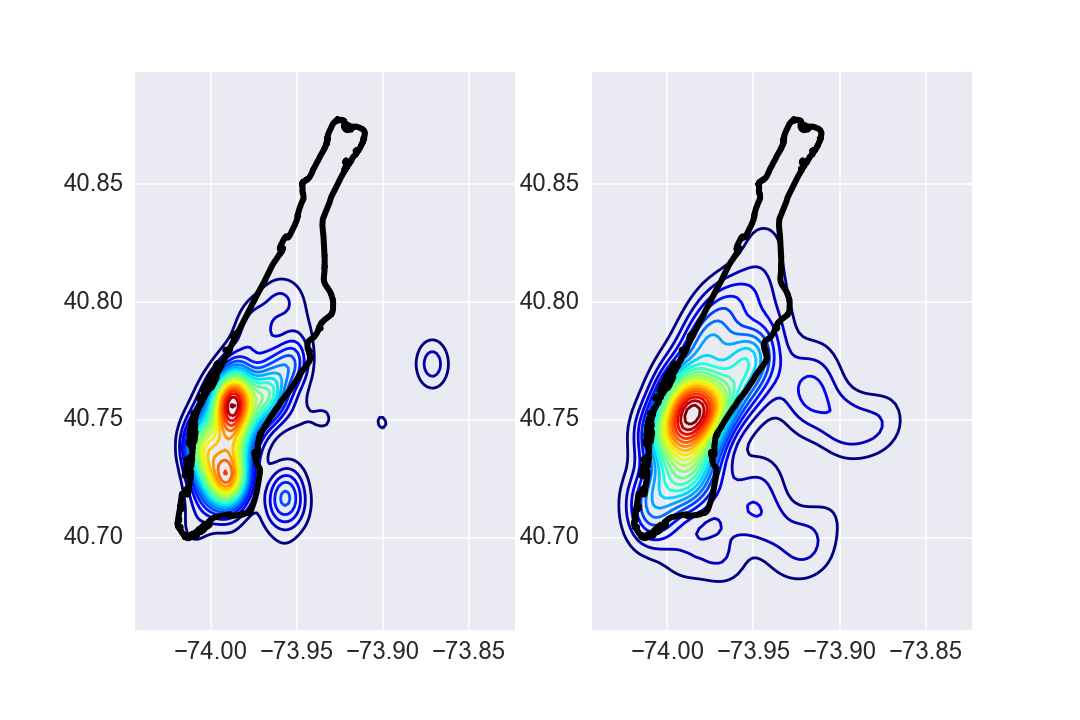
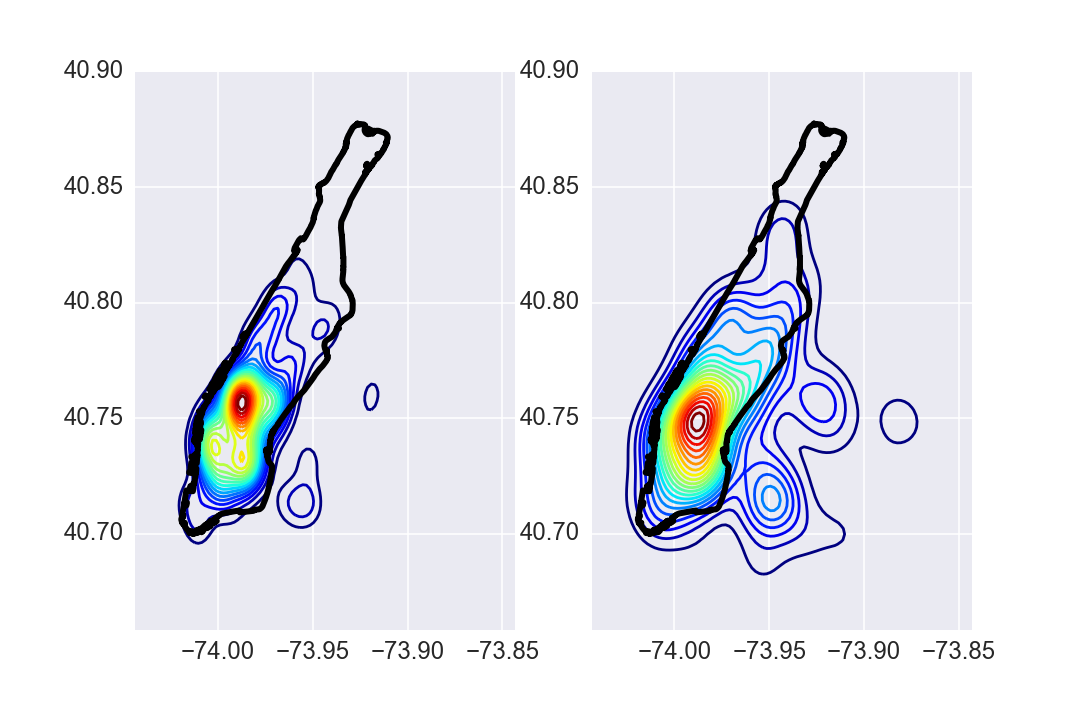
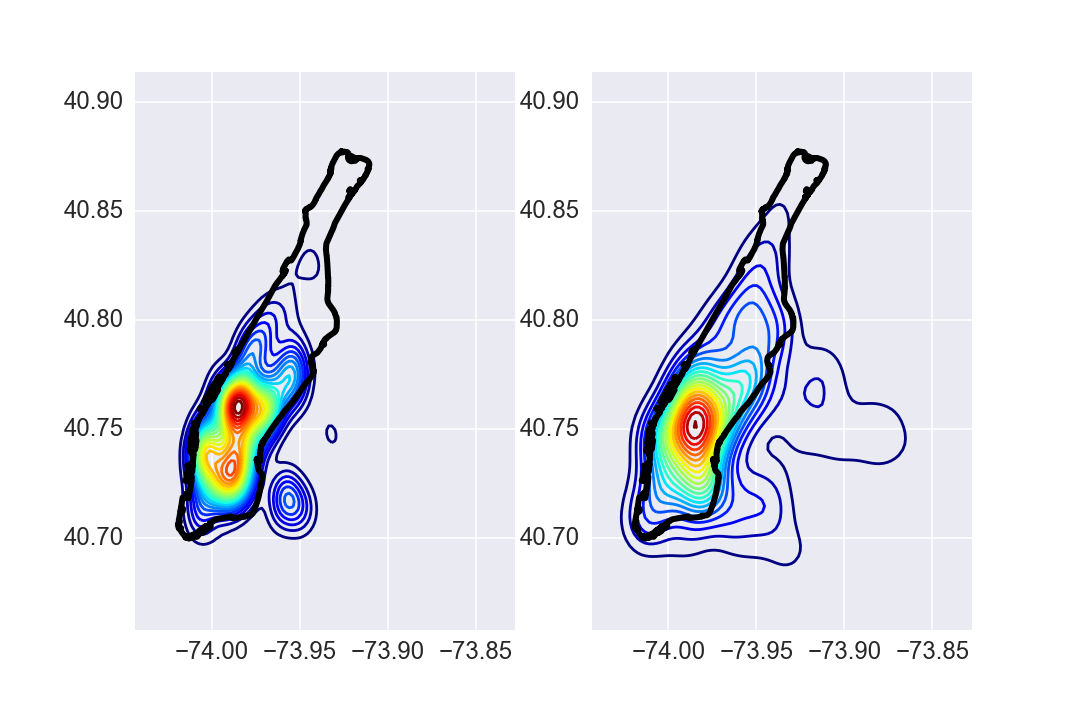
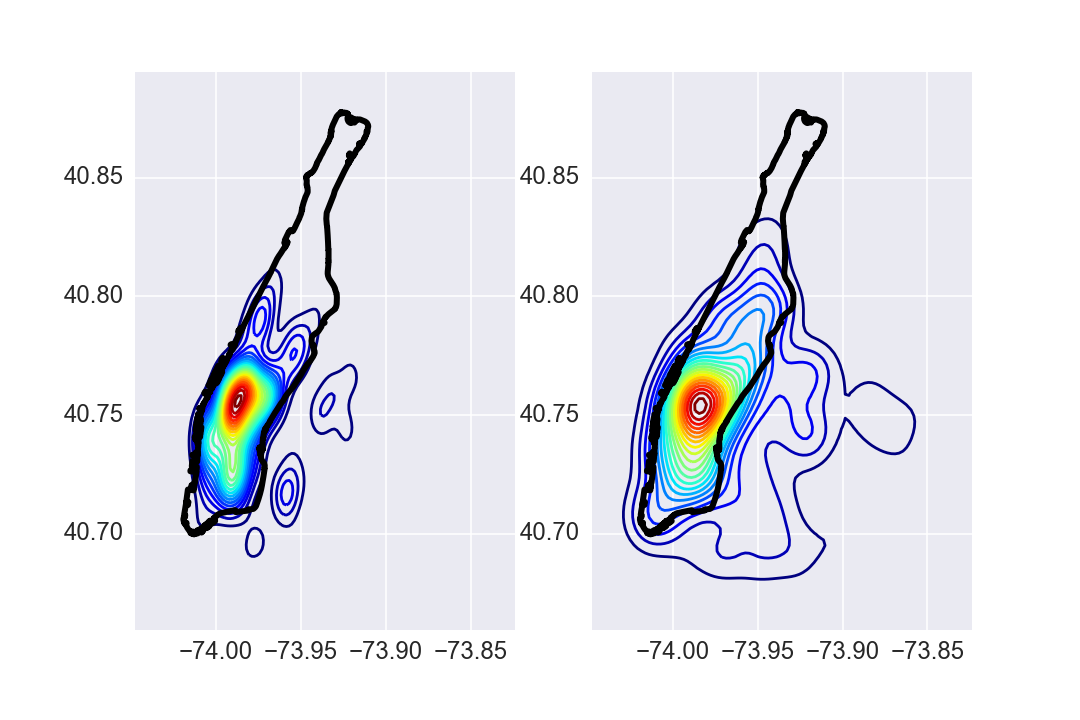
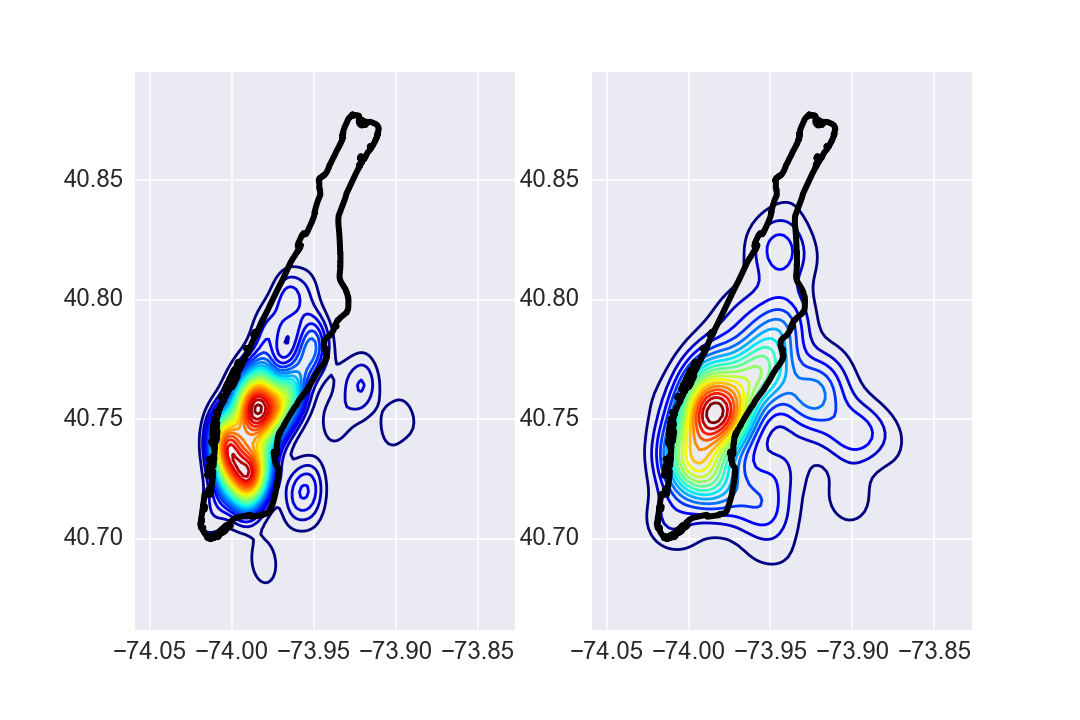

In [117]:
from matplotlib import animation
from JSAnimation import IPython_display

def density_animation():
    minx, miny, maxx, maxy = common.MANHATTAN_POLY.bounds
    fig, axarr = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 10))
    dt = timedelta(minutes=10)
    start = datetime(2014, 1, 9, 0, 0)
    end = start + dt
    p = make_density_plots(start, end, axarr[0], axarr[1]) 
    
    def init():
        return p
    
    def animate(i):
        st = start + timedelta(minutes=10 * i)
        en = start + timedelta(minutes=10 * (i + 1))
        return make_density_plots(st, en, axarr[0], axarr[1])
    
    return animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=10, interval=30)
    
density_animation()